In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

startInstantTime = time.time()

In [2]:
#Parametros de ejecucion del programa
nombreArchivoDataset = "./Datos/DatasetRegresion.csv"
nombreArchivoInformacion = "./Datos/InformacionEjercicioRegresion.txt"
numeroDimensiones = 3
numeroMuestras = 1000
listaMinimoValorPuntosPorCoordenadas = [-20.0] * (numeroDimensiones - 1)
listaMaximoValorPuntosPorCoordenadas = [20.0] * (numeroDimensiones - 1)
margenMaximoRuido = 50.0
listaCoeficientesPrincipalesFuncionLineal = [1.0] * (numeroDimensiones - 1)
coeficienteInterceptoFuncionLineal = 5.0

colorTextoVerde = (35, 155, 86)

In [3]:
def printColouredText(text, foregroundColor = (0, 0, 0), backgroundColor = (255, 255, 255)):
    return "\033[48;2;{};{};{}m\033[38;2;{};{};{}m{}\033[38;2;0;0;0m\033[48;2;255;255;255m".format(backgroundColor[0], backgroundColor[1], backgroundColor[2], foregroundColor[0], foregroundColor[1], foregroundColor[2], text)

def generarPuntosMuestra(listaCoeficientesFuncionLineal, numeroMuestras, listaMinimoValorPorCoordenadas, listaMaximoValorPorCoordenadas, margenMaximoRuido = 1.0):
    numeroDimensionesEspacio = len(listaCoeficientesFuncionLineal)
    listaPuntosMuestra = []
    listaAbscisasPuntosMuestra = []
    
    #Se generan los puntos (Se tiene como restriccion que las coordenadas de abscisas del punto no se repitan)
    for indice1 in range(numeroMuestras):
        puntoMuestraValido = False
        while puntoMuestraValido == False:
            abscisasPuntoGenerado = []
            for indice2 in range(numeroDimensionesEspacio - 1):
                abscisasPuntoGenerado += list(np.random.uniform(low = listaMinimoValorPorCoordenadas[indice2], high = listaMaximoValorPorCoordenadas[indice2], size = 1))
            if abscisasPuntoGenerado not in listaAbscisasPuntosMuestra:
                listaAbscisasPuntosMuestra.append(abscisasPuntoGenerado)
                valorPunto = np.dot(listaCoeficientesFuncionLineal[0:(numeroDimensionesEspacio - 1)], abscisasPuntoGenerado) + listaCoeficientesFuncionLineal[numeroDimensiones - 1] + margenMaximoRuido * np.random.uniform(low = -1.0, high = 1.0, size = 1)
                puntoGenerado = abscisasPuntoGenerado + [valorPunto[0]]
                listaPuntosMuestra.append(puntoGenerado)
                puntoMuestraValido = True
    return listaPuntosMuestra, listaAbscisasPuntosMuestra

def obtenerListasCoordenadasRespectivas(listaPuntos, numeroDimensiones):
    diccionarioPuntosPorCoordenadas = {}
    for indice in range(numeroDimensiones):
        diccionarioPuntosPorCoordenadas[indice] = []
        
    for puntoActual in listaPuntos:
        for indice in range(numeroDimensiones):
            coordenadaActual = puntoActual[indice]
            diccionarioPuntosPorCoordenadas[indice].append(coordenadaActual)
    return diccionarioPuntosPorCoordenadas

In [4]:
listaCoeficientesFuncionLineal = listaCoeficientesPrincipalesFuncionLineal + [coeficienteInterceptoFuncionLineal]

#Esta parte se puede comentar si no se desea que los coeficientes de la funcion lineal sean aleatorios sino fijos
listaCoeficientesFuncionLineal = list(np.random.uniform(low = -10.0, high = 10.0, size = numeroDimensiones))

listaPuntosMuestra, listaAbscisasPuntosMuestra = generarPuntosMuestra(listaCoeficientesFuncionLineal, numeroMuestras, listaMinimoValorPuntosPorCoordenadas, listaMaximoValorPuntosPorCoordenadas, margenMaximoRuido = margenMaximoRuido)

In [5]:
etiquetaCoordenadaPuntos = "x"
etiquetaPuntos = "X"
nombreColumnaValorFuncion = "Valor de la Función"
nombreColumnaAbscisasPunto = "Abscisas del Punto"
nombreColumnaPuntoCompleto = "Punto Completo"

#Construccion del dataframe: Definicion de la estructura
informacionDatasetGenerado = {}
for indice in range(numeroDimensiones - 1):
    nombreColumnaActual = "Coordenada $" + etiquetaCoordenadaPuntos + "_{" + str(indice + 1) + "}$"
    informacionDatasetGenerado[nombreColumnaActual] = []
informacionDatasetGenerado[nombreColumnaValorFuncion] = []
informacionDatasetGenerado[nombreColumnaAbscisasPunto] = []
informacionDatasetGenerado[nombreColumnaPuntoCompleto] = []

#Construccion del dataframe: Se agregan los registros
for abscisasPunto in listaAbscisasPuntosMuestra:
    informacionDatasetGenerado[nombreColumnaAbscisasPunto].append(abscisasPunto)
for punto in listaPuntosMuestra:
    informacionDatasetGenerado[nombreColumnaPuntoCompleto].append(punto)
    for indice in range(numeroDimensiones - 1):
        nombreColumnaActual = "Coordenada $" + etiquetaCoordenadaPuntos + "_{" + str(indice + 1) + "}$"
        informacionDatasetGenerado[nombreColumnaActual].append(punto[indice])
    informacionDatasetGenerado[nombreColumnaValorFuncion].append(punto[numeroDimensiones - 1])
datasetGenerado = pd.DataFrame(informacionDatasetGenerado)

#Construccion del dataframe: Indexacion de filas (Esta parte es opcional)
listaIndicesFilas = []
for indice in range(numeroMuestras):
    nombreFilaActual = "$" + etiquetaPuntos + "_{" + str(indice + 1) + "}$"
    listaIndicesFilas.append(nombreFilaActual)
datasetGenerado.index = listaIndicesFilas

datasetGenerado.to_csv(nombreArchivoDataset, index = True, encoding = 'utf-8')
display(datasetGenerado)

,Coordenada $x_{1}$,Coordenada $x_{2}$,Valor de la Función,Abscisas del Punto,Punto Completo
$X_{1}$,16.151079,14.373141,108.829529,"[16.15107933100822, 14.373141355361845]","[16.15107933100822, 14.373141355361845, 108.82..."
$X_{2}$,-19.148805,1.714268,107.432146,"[-19.148805272072206, 1.714268457217706]","[-19.148805272072206, 1.714268457217706, 107.4..."
$X_{3}$,-16.360648,-3.954261,8.983160,"[-16.360647704634403, -3.9542607707985624]","[-16.360647704634403, -3.9542607707985624, 8.9..."
$X_{4}$,1.879253,11.833587,106.495534,"[1.8792531775043173, 11.833586822721422]","[1.8792531775043173, 11.833586822721422, 106.4..."
$X_{5}$,-13.219982,8.564293,164.638670,"[-13.21998174014185, 8.564293123774807]","[-13.21998174014185, 8.564293123774807, 164.63..."
...,...,...,...,...,...
$X_{996}$,15.132479,6.829747,-41.295059,"[15.132479116616011, 6.829746903165574]","[15.132479116616011, 6.829746903165574, -41.29..."
$X_{997}$,-13.447730,-0.572116,56.383920,"[-13.447730236514715, -0.5721155536728908]","[-13.447730236514715, -0.5721155536728908, 56...."
$X_{998}$,-10.009290,17.896303,253.365364,"[-10.0092897343923, 17.89630268739203]","[-10.0092897343923, 17.89630268739203, 253.365..."
$X_{999}$,14.168144,1.758660,-37.409311,"[14.16814442340543, 1.7586604272721154]","[14.16814442340543, 1.7586604272721154, -37.40..."


<IPython.core.display.Javascript object>


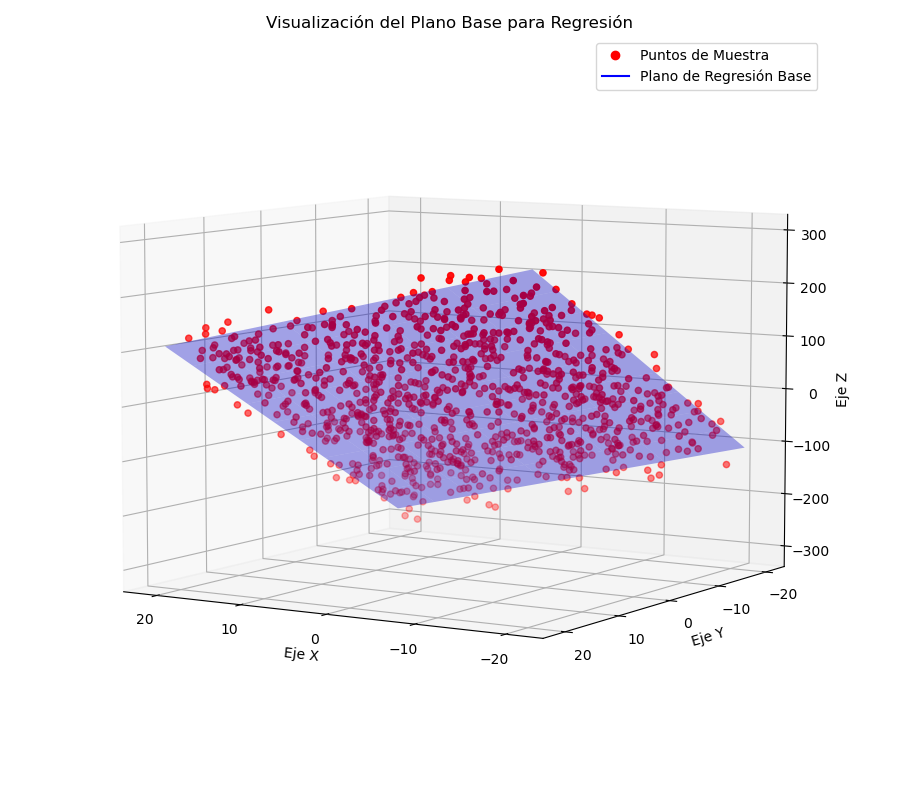

/tmp/ipykernel_15594/3915591003.py:39: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = currentFigure.gca(projection = '3d')


In [6]:
%matplotlib notebook

listaPuntosPorCoordenadasRespectivas = obtenerListasCoordenadasRespectivas(listaPuntosMuestra, numeroDimensiones)
valoresCoordenadasXPuntos = listaPuntosPorCoordenadasRespectivas[0]
valoresCoordenadasYPuntos = listaPuntosPorCoordenadasRespectivas[1]
valoresCoordenadasZPuntos = None
minimoEjeX = np.min(valoresCoordenadasXPuntos) - 1
maximoEjeX = np.max(valoresCoordenadasXPuntos) + 1
minimoEjeY = np.min(valoresCoordenadasYPuntos) - 1
maximoEjeY = np.max(valoresCoordenadasYPuntos) + 1
minimoEjeZ = None
maximoEjeZ = None

numeroMuestrasHiperplanoRegresion = 10
if numeroDimensiones == 2:
    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaYHiperplanoBase = listaCoeficientesFuncionLineal[numeroDimensiones - 2] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesFuncionLineal[numeroDimensiones - 1]
    
    plt.figure(num = 1, figsize = (9, 8))
    plt.plot(valoresCoordenadasXPuntos, valoresCoordenadasYPuntos, 'ro', label = "Puntos de Muestra")
    plt.plot(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, 'b-', label = "Recta de Regresión Base")
    plt.legend(loc = 'upper left')
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Visualización de la Recta Base para Regresión")
    plt.grid(True)
    plt.show()
elif numeroDimensiones == 3:
    valoresCoordenadasZPuntos = listaPuntosPorCoordenadasRespectivas[2]
    minimoEjeZ = np.min(valoresCoordenadasZPuntos) - 1
    maximoEjeZ = np.max(valoresCoordenadasZPuntos) + 1
    
    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaYHiperplanoBase = np.linspace(minimoEjeY, maximoEjeY, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase = np.meshgrid(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase)
    listaValoresCoordenadaZHiperplanoBase = listaCoeficientesFuncionLineal[numeroDimensiones - 3] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesFuncionLineal[numeroDimensiones - 2] * listaValoresCoordenadaYHiperplanoBase + listaCoeficientesFuncionLineal[numeroDimensiones - 1]
    
    currentFigure = plt.figure(num = 1, figsize = (9, 8))
    ax = currentFigure.gca(projection = '3d')
    ax.view_init(elev = 7, azim = 122) #Se ajusta la perspectiva manualmente de forma que se pueda visualizar los planos de separacion, los vectores de soporte y evidencia que separen los datos segun la clase a la que pertenecen (Si se cambia de plano para generar los puntos de muestra, se recomienda ajustar adecuadamente la perspectiva)
    ax.scatter(valoresCoordenadasXPuntos, valoresCoordenadasYPuntos, valoresCoordenadasZPuntos, c = 'r', marker = 'o')
    etiquetaLeyendaPuntos = mpl.lines.Line2D([0], [0], linestyle = "none", c = 'r', marker = 'o')
    ax.plot_surface(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase, color = 'b', alpha = 0.35)
    etiquetaLeyendaPlano = mpl.lines.Line2D([0], [0], linestyle = "-", c = 'b')
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_zlabel("Eje Z")
    ax.set_title("Visualización del Plano Base para Regresión")
    ax.legend([etiquetaLeyendaPuntos, etiquetaLeyendaPlano], ["Puntos de Muestra", "Plano de Regresión Base"], numpoints = 1)
    plt.tight_layout()
    plt.show()

In [7]:
outputStream = open(nombreArchivoInformacion, "w")
outputStream.write(str(numeroDimensiones) + "\n")
outputStream.write(str(listaCoeficientesFuncionLineal) + "\n")
outputStream.write(etiquetaCoordenadaPuntos + "\n")
outputStream.write(nombreColumnaValorFuncion + "\n")
outputStream.close()
print("Se ha generado el archivo", printColouredText(nombreArchivoInformacion, colorTextoVerde), "que contiene la información necesaria para el ejercicio de regresión")
print("Se ha generado el archivo", printColouredText(nombreArchivoDataset, colorTextoVerde), "que contiene los puntos de muestra para regresión")

endInstantTime = time.time()
fullRunningTime = endInstantTime - startInstantTime
runningTimeInMinutes = int(fullRunningTime / 60)
runningTimeInSeconds = int(fullRunningTime % 60)
print("Tiempo de Ejecución: {} minuto(s) y {} segundo(s)".format(runningTimeInMinutes, runningTimeInSeconds))

Se ha generado el archivo ./Datos/InformacionEjercicioRegresion.txt que contiene la información necesaria para el ejercicio de regresión
Se ha generado el archivo ./Datos/DatasetRegresion.csv que contiene los puntos de muestra para regresión
Tiempo de Ejecución: 0 minuto(s) y 0 segundo(s)
